# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: xx

Group Members:
- Name (NIM)
- Name (NIM)
- ...

## Import Libraries

In [6]:
import pandas as pd
import numpy as np

# Import other libraries if needed

## Import Dataset

In [11]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

df = pd.read_csv('train.csv')
df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [80]:
def correct_data_types(df):
    # Create a dataframe copy to avoid modifying the original
    df_new = df.copy()

    # Binary features to convert to boolean
    binary_features = [
        'HasTitle', 'HasFavicon', 'HasDescription', 'HasSocialNet',
        'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField',
        'HasCopyrightInfo', 'HasExternalFormSubmit', 'IsDomainIP',
        'IsHTTPS', 'IsResponsive', 'HasObfuscation', 'Bank', 'Pay',
        'Crypto', 'Robots', 'label'
    ] # This is done based on the name and data it holds (the metadata in the website says that it is not a boolean, but still we can see it clearly in the dataset that this data should have a boolean data type)

    # Convert binary features to boolean
    for col in binary_features:
      df_new[col] = df_new[col].astype("boolean")

    return df_new

In [82]:
df = correct_data_types(df)

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def analyze_missing_values(df):
    # Print the headline
    print("\n2.1. Missing Values Analysis")
    print("-" * 50)

    # Calculate missing values statistics
    missing_counts = df.isnull().sum()
    missing_percentages = (missing_counts / len(df) * 100).round(2)

    # Get data types of each column
    data_types = df.dtypes

    # Create a summary DataFrame (to visualize it in the form of tables)
    missing_summary = pd.DataFrame({
        'Data Type': data_types,
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percentages,
    })

    # Add Has Missing Values column
    missing_summary['Has Missing Values'] = missing_summary['Missing Count'] > 0

    # Sort missing columns by percentage of missing values
    missing_summary = missing_summary.sort_values('Missing Percentage', ascending=False)

    # Print the output
    print("Missing values summary:")
    summary_string = missing_summary.to_string()
    # Split string into lines and add numbering
    lines = summary_string.split('\n')
    data_lines = lines[1:]
    
    # Print header
    print(f"    {lines[0]}")
    
    # Print numbered data rows
    for i, line in enumerate(data_lines, 1):
        print(f"{i:2d}. {line}")
    
    # Part 2: Analyze Correlation for Each Column with Missing Values
    print("\nAnalyzing Correlations for Columns with Missing Values:")
    
    # Get columns with missing values
    cols_with_missing = missing_summary[missing_summary['Has Missing Values']].index.tolist()
    
    # Filter only numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Calculate correlations between columns with missing values and other numeric columns
    correlation_results = {}

    for col in cols_with_missing:
        # Ensure that correlation calculation is only for numeric columns
        if col in numeric_cols:
            corr_matrix = df[numeric_cols].corr(method='pearson')[col].dropna()  # Exclude the missing values from correlation
            
            # Get the top 5 correlations (positive and negative)
            top_corr = corr_matrix.abs().sort_values(ascending=False).head(6)  # Including the column itself
            
            # Exclude the column itself from the top correlations
            top_corr = top_corr[top_corr.index != col].head(5)
            
            correlation_results[col] = top_corr

            # Print the top 5 correlations for the current column
            print(f"\nTop 5 correlations for column '{col}':")
            for feature, corr in top_corr.items():
                print(f"{feature}: {corr:.3f}")

    return correlation_results


In [112]:
analyze_missing_values(df)


2.1. Missing Values Analysis
--------------------------------------------------
Missing values summary:
                               Data Type  Missing Count  Missing Percentage  Has Missing Values
 1. Domain                        object          70197               50.00                True
 2. NoOfExternalRef              float64          69379               49.41                True
 3. LineOfCode                   float64          69153               49.25                True
 4. HasSocialNet                 boolean          67999               48.43                True
 5. LargestLineLength            float64          67928               48.38                True
 6. NoOfURLRedirect              float64          67384               47.99                True
 7. HasCopyrightInfo             boolean          67345               47.97                True
 8. NoOfCSS                      float64          67134               47.81                True
 9. NoOfObfuscatedChar         

{'NoOfExternalRef': NoOfSelfRef                   0.575342
 LineOfCode                    0.361161
 NoOfImage                     0.201295
 NoOfJS                        0.177369
 NoOfOtherSpecialCharsInURL    0.059058
 Name: NoOfExternalRef, dtype: float64,
 'LineOfCode': NoOfSelfRef        0.427239
 NoOfImage          0.369276
 NoOfExternalRef    0.361161
 NoOfJS             0.203070
 NoOfiFrame         0.145155
 Name: LineOfCode, dtype: float64,
 'LargestLineLength': DegitRatioInURL               0.051582
 DomainLength                  0.051455
 NoOfOtherSpecialCharsInURL    0.049532
 NoOfDegitsInURL               0.044794
 CharContinuationRate          0.039257
 Name: LargestLineLength, dtype: float64,
 'NoOfURLRedirect': NoOfSelfRedirect    0.456303
 LineOfCode          0.135636
 NoOfImage           0.081560
 NoOfJS              0.076660
 NoOfiFrame          0.075577
 Name: NoOfURLRedirect, dtype: float64,
 'NoOfCSS': NoOfJS             0.449727
 NoOfImage          0.406763
 NoOfS

In [86]:
# Global variables for numerical columns and categorical columns (reusability purposes)
numerical_columns = df.select_dtypes(include=[ 'int64', 'float64']).columns # All of numerical columns should have the int or float as type
categorical_columns = df.select_dtypes(include=['object', 'boolean']).columns # All of categorical columns should have object or bool as type

# Drop ID from Numerical Columns because it is not a numerical nor a categorical columns (it is only an identifier so it doesn't fit into a numerical or categorical columns)
numerical_columns = numerical_columns.drop('id')

# Drop URL, Title, and Domain because it is not a categorical data nor a numerical columns (it doesn't categorize the data, we've analyzed from the unique values URL and Domain --> it is a unique values so it doesn't recognized as categorical features)
categorical_columns = categorical_columns.drop({'URL', 'Domain','Title'})

# Global variables for target columns (The Output Variable)
target_column = 'label'

In [87]:
print(numerical_columns)

Index(['URLLength', 'DomainLength', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode',
       'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef'],
      dtype='object')


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Analyzing The Correlation between Each Features
# Input  : df (dataframe), numerical_columns, categorical_columns (global variable that has been defined at the beginning)
# Output : -

def analyze_correlations_comprehensive(df, numerical_columns, categorical_columns): # Perlu diperika; runtime error karena RAM habis (?) -> maybe karena harus compare terlalu banyak feature padahal di kode cuma select beberapa feature
  # Print the headline
  print("\n3.1. Comprehensive Correlation Analysis")
  print("-" * 50)

  # Make a copy of the original dataframe
  df_ori = df.copy()

  # Part 1: Numerical vs Numerical Correlations
  print("\nAnalyzing Numerical vs Numerical Correlations:")

  for method in ['pearson', 'spearman']: # Correlation using Pearson and Spearman Analysis
    print(f"\n{method.capitalize()} Correlation Analysis:")

    corr_matrix = df[numerical_columns].corr(method=method)

    # Create correlation heatmap
    plt.figure(figsize=(20, 12))
    sns.heatmap(corr_matrix,annot=True,  cmap="coolwarm",  fmt=".1f",  square=True,  cbar_kws={"shrink": 0.1})
    plt.title(f'{method.capitalize()} Correlation Matrix (Top 10 Numerical Features)')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Print strongest correlations
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    strongest = (upper_tri.stack().sort_values(key=abs, ascending=False).head(5))
    print("\nTop 5 strongest correlations:")
    for (feat1, feat2), corr in strongest.items():
      print(f"{feat1} -- {feat2}: {corr:.3f}")

    # Clear memory and reset all
    del corr_matrix, upper_tri, strongest
    plt.close('all')

  # Part 2: Categorical vs Categorical Correlations
  print("\nAnalyzing Categorical vs Categorical Correlations:")

  # Select top categorical features for analysis
  key_categorical = categorical_columns

  # Create a matrix to store Cramer's V values
  cramer_matrix = np.zeros((len(key_categorical), len(key_categorical)))

  correlations = []

  # Analyze all the categorical features
  for i, col1 in enumerate(key_categorical):
    for j, col2 in enumerate(key_categorical):
      if i < j:  # Only calculate upper triangle
        contingency = pd.crosstab(df[col1], df[col2])
        chi2, p_value, _, _ = stats.chi2_contingency(contingency)

        # Calculate Cramer's V
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        cramer_v = np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

        cramer_matrix[i, j] = cramer_v
        cramer_matrix[j, i] = cramer_v

        correlations.append({
            'Variable 1': col1,
            'Variable 2': col2,
            "Cramer's V": cramer_v,
            'p-value': p_value
        })

        # Clear memory and delete unused data
        del contingency

  # Print the correlation table
  correlation_df = pd.DataFrame(correlations)
  correlation_df = correlation_df.sort_values("Cramer's V", ascending=False)
  correlation_df["Cramer's V"] = correlation_df["Cramer's V"].round(3)
  correlation_df['p-value'] = correlation_df['p-value'].round(3)
  pd.set_option('display.max_rows', None)
  display(correlation_df)

  # Visualize Cramer's V matrix
  plt.figure(figsize=(20, 12))
  sns.heatmap(pd.DataFrame(cramer_matrix,index=key_categorical,columns=key_categorical),cmap='YlOrRd',annot=True,fmt='.2f',square=True, cbar_kws={"shrink": 0.1})
  plt.title("Cramer's V Between Categorical Variables")
  plt.xticks(rotation=45, ha='right')
  plt.yticks(rotation=0)
  plt.tight_layout()
  plt.show()
  plt.close()


3.1. Comprehensive Correlation Analysis
--------------------------------------------------

Analyzing Numerical vs Numerical Correlations:

Pearson Correlation Analysis:


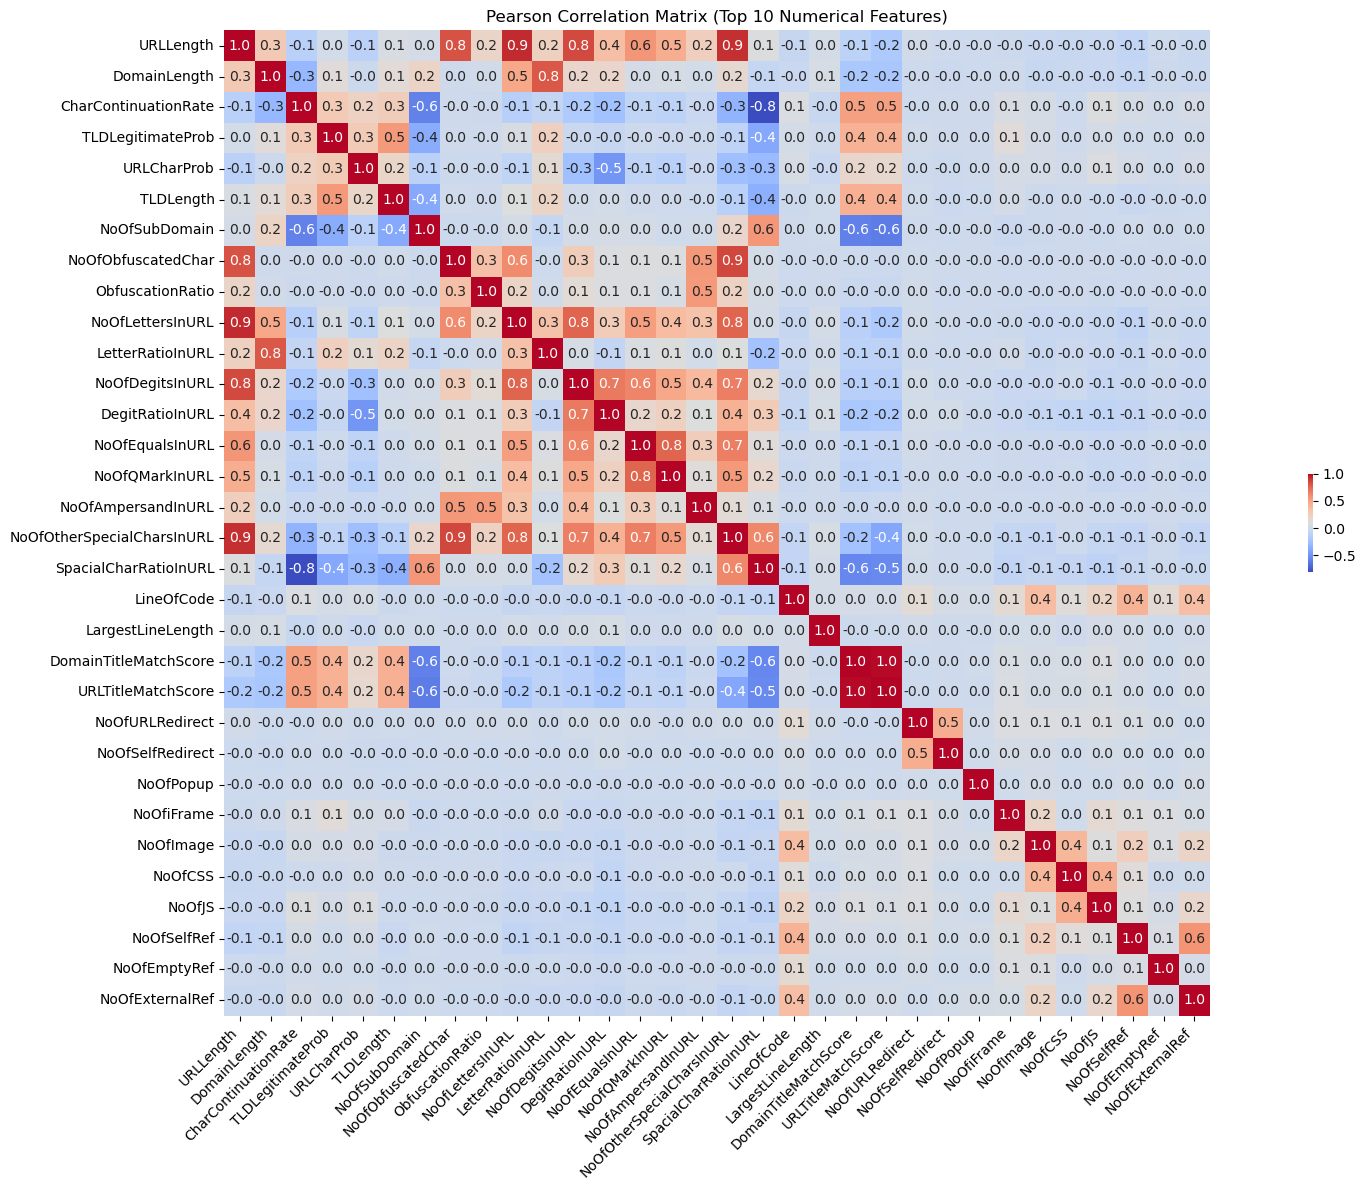


Top 5 strongest correlations:
DomainTitleMatchScore -- URLTitleMatchScore: 0.991
URLLength -- NoOfLettersInURL: 0.934
URLLength -- NoOfOtherSpecialCharsInURL: 0.918
NoOfObfuscatedChar -- NoOfOtherSpecialCharsInURL: 0.858
URLLength -- NoOfDegitsInURL: 0.848

Spearman Correlation Analysis:


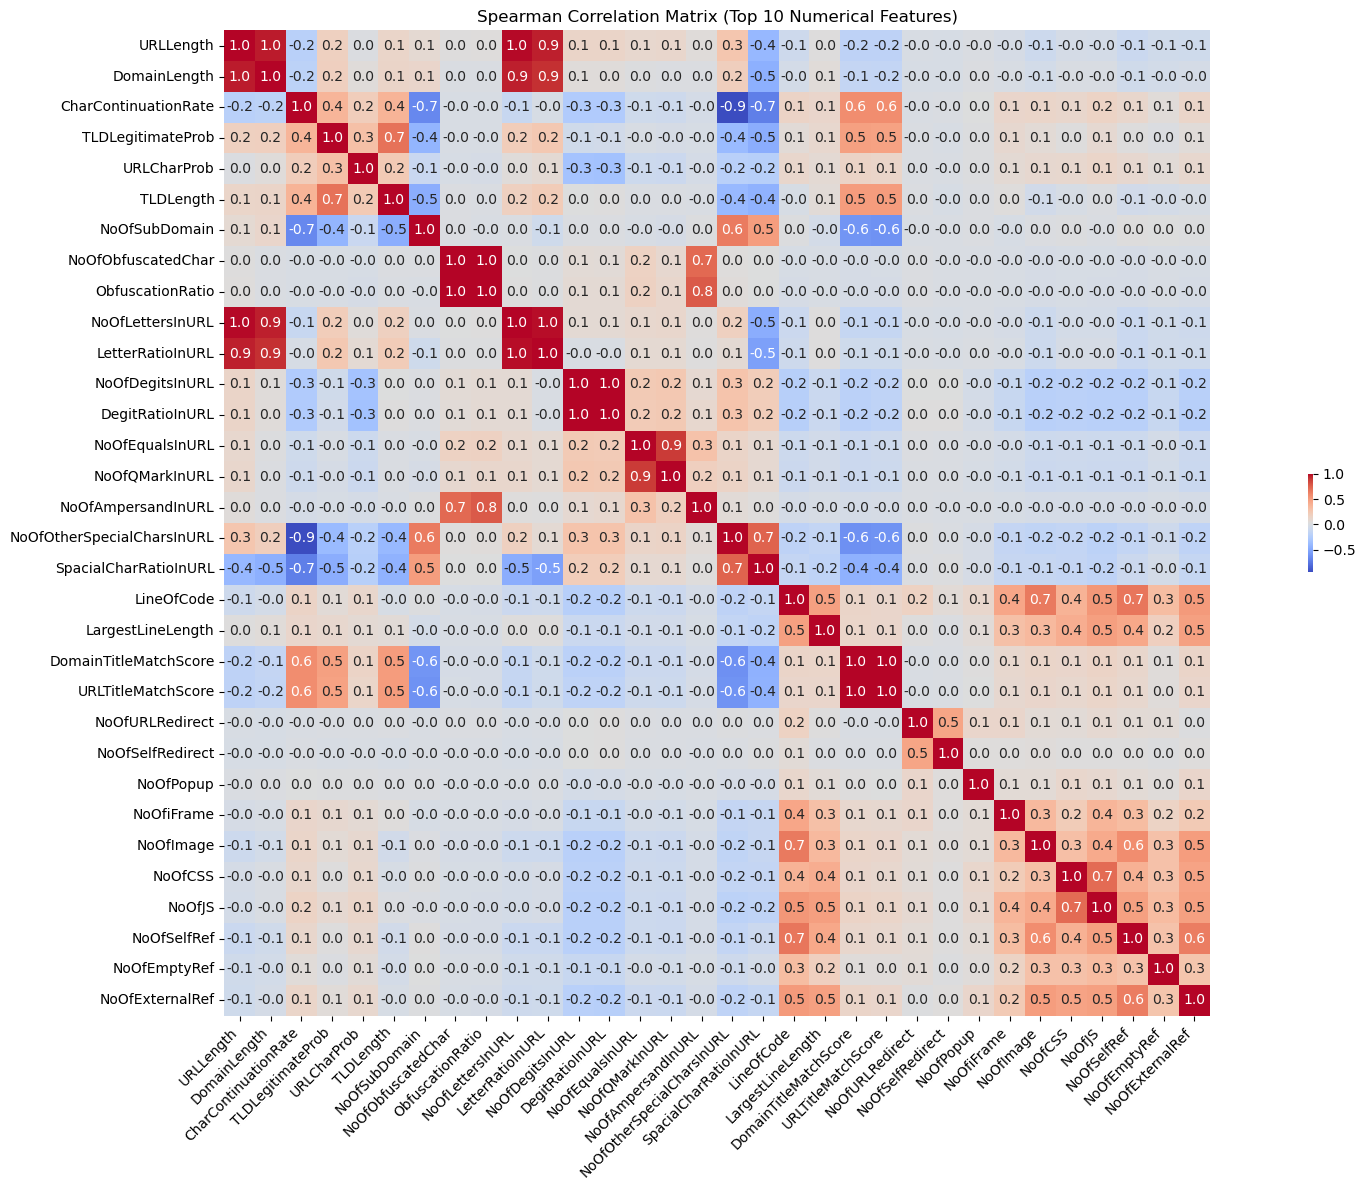


Top 5 strongest correlations:
NoOfObfuscatedChar -- ObfuscationRatio: 1.000
NoOfDegitsInURL -- DegitRatioInURL: 1.000
DomainTitleMatchScore -- URLTitleMatchScore: 0.993
URLLength -- NoOfLettersInURL: 0.986
NoOfLettersInURL -- LetterRatioInURL: 0.981

Analyzing Categorical vs Categorical Correlations:


,Variable 1,Variable 2,Cramer's V,p-value
1,FILENAME,TLD,1.000,0.475
0,FILENAME,IsDomainIP,1.000,0.498
9,FILENAME,HasExternalFormSubmit,1.000,0.498
17,FILENAME,HasCopyrightInfo,1.000,0.498
15,FILENAME,Pay,1.000,0.498
14,FILENAME,Bank,1.000,0.498
13,FILENAME,HasPasswordField,1.000,0.498
11,FILENAME,HasSubmitButton,1.000,0.498
12,FILENAME,HasHiddenFields,1.000,0.498
7,FILENAME,IsResponsive,1.000,0.498


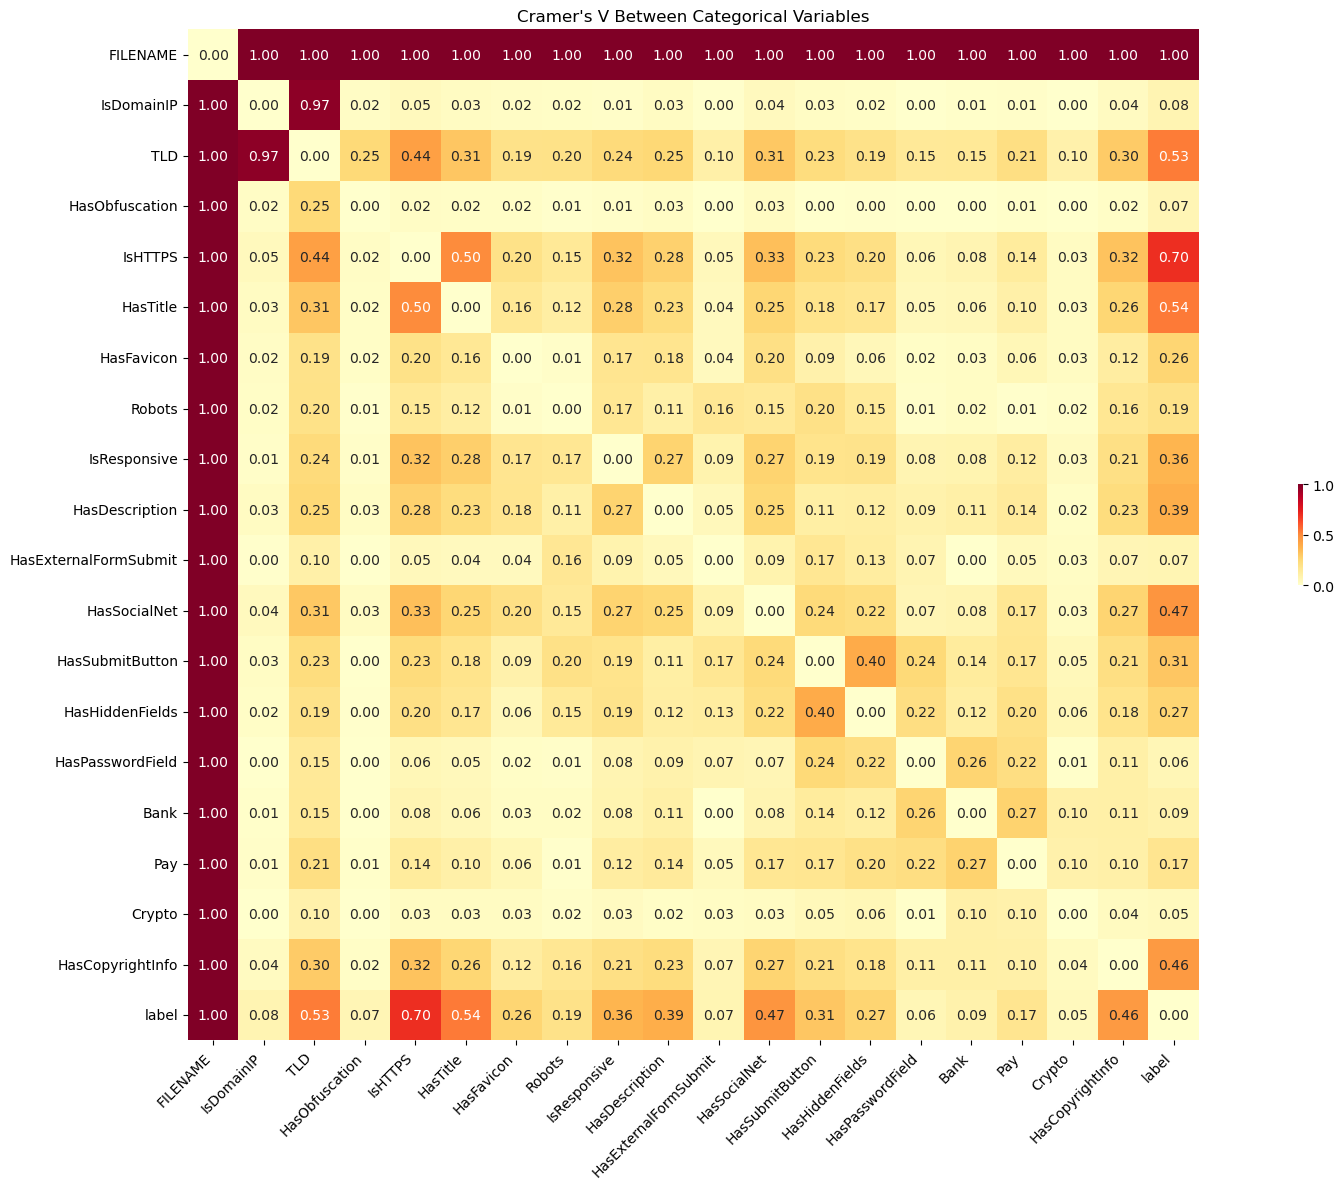

In [104]:
analyze_correlations_comprehensive(df, numerical_columns, categorical_columns)

In [ ]:
# 1.  Data Imputation

# a. 


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
# Write your code here

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
# Write your code here

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [ ]:
# Write your code here

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [ ]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
# Write your code here

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:
# Write your code here

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [ ]:
# Write your code here

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [ ]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
# Type your code here

## B. Naive Bayes

In [ ]:
# Type your code here

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`